Kaggle Titanic Data Set:
Predict survivors based on training set

In [32]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sns
#import graphviz 
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('C:\\Users\\Galen Miller\\Desktop\\Python Course\\Kaggle Titanic\\train.csv', index_col='PassengerId')

In [11]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


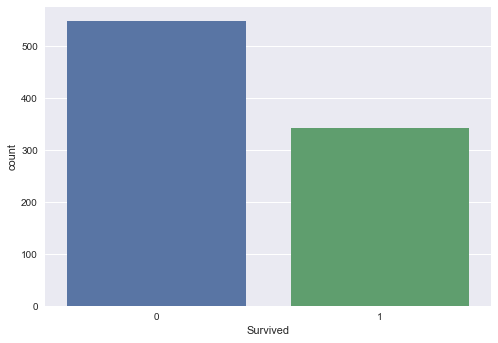

In [56]:
sns.countplot(x = 'Survived', data = train)
plt.show()

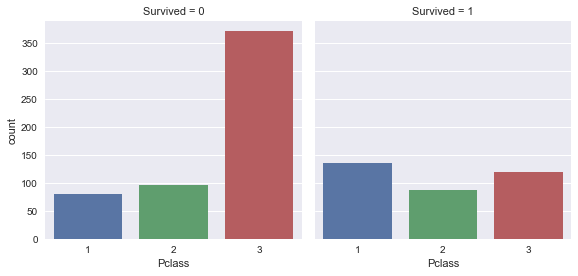

In [62]:
sns.factorplot(x = 'Pclass', data = train, col = 'Survived', kind = 'count')
plt.show()

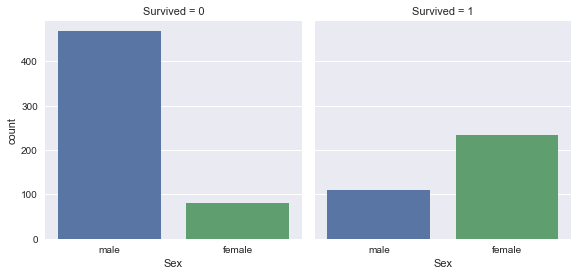

In [3]:
sns.factorplot(x = 'Sex', data = train, col = 'Survived', kind = 'count')
plt.show()

In [6]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train2 = train.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis = 1)
#convert sex to binary classification
train2.Sex.replace('male', 1, inplace = True)
train2.Sex.replace('female', 0, inplace = True)
print train2.Sex.head()

PassengerId
1    1
2    0
3    0
4    0
5    1
Name: Sex, dtype: int64


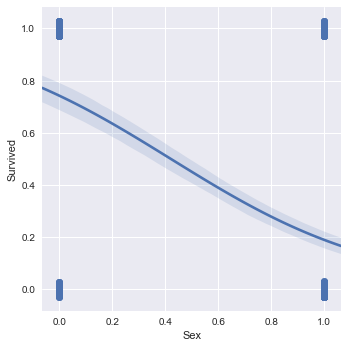

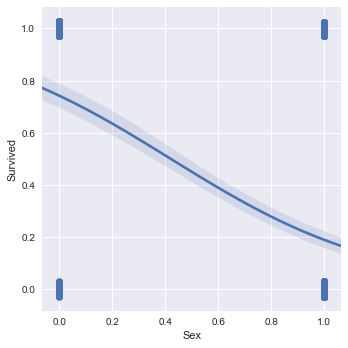

In [13]:
sns.lmplot(x="Sex", y="Survived", data=train2,
           logistic=True, y_jitter=.03)
plt.show()

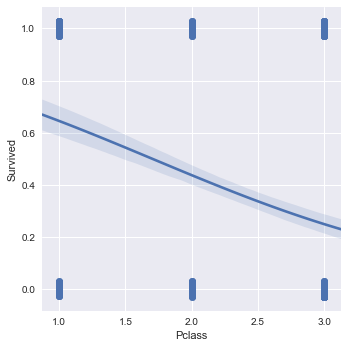

In [14]:
sns.lmplot(x="Pclass", y="Survived", data=train2,
           logistic=True, y_jitter=.03)
plt.show()

In [10]:
#Split into train, test, and validate
train3, test, validate = np.split(train2.sample(frac=1), [int(.6*len(train2)), int(.8*len(train2))])  
print train3.shape, test.shape, validate.shape

(534, 7) (178, 7) (179, 7)


In [11]:
np.any(np.isnan(train3['Age']))
train3.fillna(0, inplace = True)
#print train3.Age
np.any(np.isnan(train3['Age']))

False

In [41]:
model = LogisticRegression()
rfe = RFE(model, 3)
rfe = rfe.fit(train3[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']], train3.Survived)
print(rfe.support_)
print(rfe.ranking_)
#Pclass, Sex, SibSp best features

[ True  True False  True False False]
[1 1 2 1 3 4]


In [12]:
train_best = train3[['Survived', 'Pclass', 'Sex', 'SibSp']]
test_best = test[['Survived', 'Pclass', 'Sex', 'SibSp']]
validate_best = validate[['Survived', 'Pclass', 'Sex', 'SibSp']]

y_train = train_best['Survived']  
x_train = train_best.drop(['Survived'], axis=1)  
y_test = test_best['Survived']  
x_test = test_best.drop(['Survived'], axis=1)  
y_validate = validate_best['Survived']  
x_validate = validate_best.drop(['Survived'], axis=1)

In [13]:
# Instantiate
logit_model = LogisticRegression()  
# Fit
logit_model = logit_model.fit(x_train, y_train)  
# How accurate?
logit_model.score(x_train, y_train)  

0.7752808988764045

In [14]:
# Predictions on the test dataset
predicted = pd.DataFrame(logit_model.predict(x_test))  
# Probabilities on the test dataset
probs = pd.DataFrame(logit_model.predict_proba(x_test))  
print metrics.accuracy_score(y_test, predicted)

0.820224719101


In [15]:
logit_model_metrics = metrics.classification_report(y_test, predicted)
print metrics.classification_report(y_test, predicted)

             precision    recall  f1-score   support

          0       0.82      0.88      0.85       103
          1       0.82      0.73      0.77        75

avg / total       0.82      0.82      0.82       178



Compare those metrics to other analyses

Decision Tree Classifier

In [16]:
tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(x_train, y_train)
tree_model.score(x_train, y_train)

0.79588014981273403

In [17]:
# Predictions on the test dataset
predicted = pd.DataFrame(tree_model.predict(x_test))  
# Probabilities on the test dataset
probs = pd.DataFrame(tree_model.predict_proba(x_test))  
print metrics.accuracy_score(y_test, predicted)

0.814606741573


In [18]:
tree_model_metrics = metrics.classification_report(y_test, predicted)
print metrics.classification_report(y_test, predicted)

             precision    recall  f1-score   support

          0       0.80      0.90      0.85       103
          1       0.84      0.69      0.76        75

avg / total       0.82      0.81      0.81       178



In [25]:
#dot_data = tree.export_graphviz(tree_model, out_file=None,  
#                     feature_names=x_test.columns.tolist(),
#                     class_names=['remain', 'left'],
#                     filled=True, rounded=True,  
#                     special_characters=True)  
#decision_graph = graphviz.Source(dot_data)  
#decision_graph 

Random Forest 

In [28]:
# Instantiate
rf = RandomForestClassifier()  
# Fit
rf_model = rf.fit(x_train, y_train)  
# training accuracy 
rf_model.score(x_train, y_train)

0.7921348314606742

In [29]:
# Predictions/probs on the test dataset
predicted = pd.DataFrame(rf_model.predict(x_test))  
probs = pd.DataFrame(rf_model.predict_proba(x_test))
print metrics.accuracy_score(y_test, predicted)

0.814606741573


In [30]:
tree_model_metrics = metrics.classification_report(y_test, predicted)
print metrics.classification_report(y_test, predicted)

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       103
          1       0.85      0.68      0.76        75

avg / total       0.82      0.81      0.81       178



Naive Bayes

In [33]:
# Instantiate
bayes_model = GaussianNB()  
# Fit the model
bayes_model.fit(x_train, y_train)  
# Accuracy
bayes_model.score(x_train, y_train)

0.75468164794007486

In [34]:
# Predictions/probs on the test dataset
predicted = pd.DataFrame(bayes_model.predict(x_test))  
probs = pd.DataFrame(bayes_model.predict_proba(x_test))
print metrics.accuracy_score(y_test, predicted)

0.797752808989


In [35]:
bayes_model_metrics = metrics.classification_report(y_test, predicted)
print metrics.classification_report(y_test, predicted)

             precision    recall  f1-score   support

          0       0.86      0.78      0.82       103
          1       0.73      0.83      0.77        75

avg / total       0.81      0.80      0.80       178



KNN

In [36]:
# instantiate learning model (k = 3)
knn_model = KNeighborsClassifier(n_neighbors=3)  
# fit the model
knn_model.fit(x_train, y_train)  
# Accuracy
knn_model.score(x_train, y_train)

0.75655430711610483

In [37]:
# Predictions/probs on the test dataset
predicted = pd.DataFrame(knn_model.predict(x_test))  
probs = pd.DataFrame(knn_model.predict_proba(x_test))
print metrics.accuracy_score(y_test, predicted)

0.797752808989


In [38]:
knn_model_metrics = metrics.classification_report(y_test, predicted)
print metrics.classification_report(y_test, predicted)

             precision    recall  f1-score   support

          0       0.81      0.84      0.83       103
          1       0.77      0.73      0.75        75

avg / total       0.80      0.80      0.80       178



Logistic Regression seems to perform the best. 
Now apply it to real test data

In [39]:
test_final = pd.read_csv('C:\\Users\\Galen Miller\\Desktop\\Python Course\\Kaggle Titanic\\test.csv', index_col='PassengerId')

In [40]:
test_final.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [46]:
test_final2 = test_final.drop(['Name','Age', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis = 1)
#convert sex to binary classification
test_final2.Sex.replace('male', 1, inplace = True)
test_final2.Sex.replace('female', 0, inplace = True)
print test_final2.Sex.head()

PassengerId
892    1
893    0
894    1
895    1
896    0
Name: Sex, dtype: int64


In [47]:
test_final2.head()

,Pclass,Sex,SibSp
PassengerId,,,
892,3,1,0
893,3,0,1
894,2,1,0
895,3,1,0
896,3,0,1


In [48]:
predicted = pd.DataFrame(logit_model.predict(test_final2)) 

In [51]:
predicted.describe()

,0
count,418.000000
mean,0.358852
std,0.480238
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


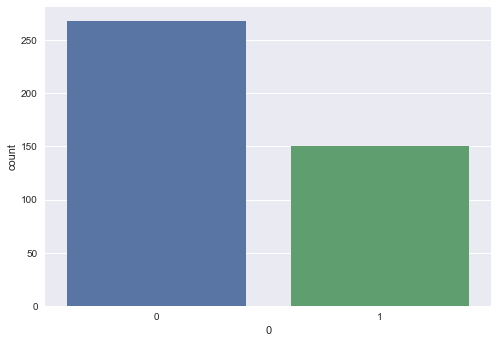

In [54]:
sns.countplot(x = predicted[0], data = predicted)
plt.show()